<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [284]:
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [ ]:
# Здесь изначально был доступ к тазе банных,
# но добрый дядя сломал игрушку,
# селяви.


In [286]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [287]:
query_3_1 = f'''
SELECT COUNT(*) AS total_vacancies
FROM public.vacancies;
'''

In [288]:
df = pd.read_sql_query(query_3_1, connection)
df

,total_vacancies
0,49197


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [289]:
query_3_2 = f'''
SELECT COUNT(*) AS total_employers
FROM public.employers;
'''

In [290]:
df = pd.read_sql_query(query_3_2, connection)
df

,total_employers
0,23501


3. Посчитате с помощью запроса количество регионов (таблица areas).

In [291]:
query_3_3 = f'''
SELECT COUNT(*) AS total_areas
FROM public.areas;
'''

In [292]:
df = pd.read_sql_query(query_3_3, connection)
df

,total_areas
0,1362


4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [293]:
query_3_4 = f'''
SELECT COUNT(*) AS total_working_areas
FROM public.industries;
'''

In [294]:
df = pd.read_sql_query(query_3_4, connection)
df

,total_working_areas
0,294


***

In [295]:
# Исходя из запросов выше, можно сделать выводы, что в среднем на одного работодателя приходится две вакансии.
# Работодатели находятся по всей стране, и не только.

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [296]:
query_4_1 = f'''
SELECT 
    a.name AS region,
    COUNT(v.id) AS cnt
FROM 
    public.vacancies v
JOIN 
    public.areas a ON v.area_id = a.id
GROUP BY 
    a.name
ORDER BY 
    cnt DESC;
'''

In [297]:
df = pd.read_sql_query(query_4_1, connection)
df

,region,cnt
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892
...,...,...
764,Тарко-Сале,1
765,Новоаннинский,1
766,Бирск,1
767,Сасово,1


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [298]:
query_4_2 = f'''
SELECT 
    COUNT(*) AS vacancies_with_salary
FROM 
    public.vacancies
WHERE 
    salary_from IS NOT NULL 
    OR salary_to IS NOT NULL;
'''

In [299]:
df = pd.read_sql_query(query_4_2, connection)
df

,vacancies_with_salary
0,24073


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [300]:
query_4_3 = f'''
SELECT 
    ROUND(AVG(salary_from)) AS average_salary_from,
    ROUND(AVG(salary_to)) AS average_salary_to
FROM 
    public.vacancies;
'''

In [301]:
df = pd.read_sql_query(query_4_3, connection)
df

,average_salary_from,average_salary_to
0,71065.0,110537.0


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [302]:
query_4_4 = f'''
SELECT 
    schedule,
    employment,
    COUNT(*) AS vacancy_count
FROM 
    public.vacancies
GROUP BY 
    schedule, employment
ORDER BY 
    vacancy_count DESC;
'''

In [303]:
df = pd.read_sql_query(query_4_4, connection)
df

,schedule,employment,vacancy_count
0,Полный день,Полная занятость,35367
1,Удаленная работа,Полная занятость,7802
2,Гибкий график,Полная занятость,1593
3,Удаленная работа,Частичная занятость,1312
4,Сменный график,Полная занятость,940
5,Полный день,Стажировка,569
6,Вахтовый метод,Полная занятость,367
7,Полный день,Частичная занятость,347
8,Гибкий график,Частичная занятость,312
9,Полный день,Проектная работа,141


5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [304]:
query_4_5 = f'''
SELECT experience, COUNT(*) AS vacancy_count
FROM public.vacancies
GROUP BY experience
ORDER BY vacancy_count ASC;
'''

In [305]:
df = pd.read_sql_query(query_4_5, connection)
df

,experience,vacancy_count
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


***

In [306]:
# По числу вакансий лидируют крупные города. 
# Также произведен анализ о типе занятости соискателей, где лидирует позиция "Полная занятость - Полный день".
# В большинстве вакансий указан требуемый опыт работы "от 1 года до 3 лет". Это говорит о том, что компании 
# готовы обучать новых сотрудников.

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [307]:
query_5_1 = f'''
WITH RankedEmployers AS (
    SELECT e.name, COUNT(v.id) AS vacancy_count,
    ROW_NUMBER() OVER (ORDER BY COUNT(v.id) DESC) AS rnk
    FROM public.employers e
    JOIN public.vacancies v ON e.id = v.employer_id
    GROUP BY e.name
)
SELECT name
FROM RankedEmployers
WHERE rnk IN (1, 5);
'''

In [308]:
df = pd.read_sql_query(query_5_1, connection)
df

,name
0,Яндекс
1,Газпром нефть


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [309]:
query_5_2 = f'''
SELECT a.name area, COUNT(DISTINCT v.id) vacation, COUNT(distinct e.id) company
FROM areas a
LEFT JOIN vacancies v ON a.id = v.area_id
LEFT JOIN employers e ON a.id = e.area
WHERE v.area_id IS NULL
GROUP BY a.name
ORDER BY 3 DESC;
'''

In [310]:
df = pd.read_sql_query(query_5_2, connection)
df

,area,vacation,company
0,Россия,0,410
1,Казахстан,0,207
2,Московская область,0,75
3,Краснодарский край,0,19
4,Беларусь,0,18
...,...,...,...
588,Кувандык,0,0
589,Куйбышев,0,0
590,Куйбышево (Ростовская область),0,0
591,Култаево,0,0


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [311]:
query_5_3 = f'''
SELECT 
    e.id AS employer_id,
    e.name AS employer_name,
    COUNT(DISTINCT v.area_id) AS region_count
FROM 
    public.employers e
JOIN 
    public.vacancies v ON e.id = v.employer_id
GROUP BY 
    e.id, e.name
ORDER BY 
    region_count DESC;
'''

In [312]:
df = pd.read_sql_query(query_5_3, connection)
df

,employer_id,employer_name,region_count
0,1740,Яндекс,181
1,2748,Ростелеком,152
2,5724811,Спецремонт,116
3,5130287,Поляков Денис Иванович,88
4,3682876,ООО ЕФИН,71
...,...,...,...
14901,810278,НПП Авиатрон,1
14902,810313,Центр дистанционных торгов,1
14903,810551,Городские Телекоммуникационные Системы,1
14904,810688,"Введенский, Отель",1


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [313]:
query_5_4 = f'''
SELECT COUNT(*) AS employer_count
FROM public.employers e
WHERE e.id NOT IN (SELECT employer_id FROM public.employers_industries);
'''

In [314]:
df = pd.read_sql_query(query_5_4, connection)
df

,employer_count
0,8419


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [315]:
query_5_5 = f'''
SELECT e.name
FROM public.employers e
JOIN public.employers_industries ei ON e.id = ei.employer_id
GROUP BY e.id, e.name
HAVING COUNT(DISTINCT ei.industry_id) = 4
ORDER BY e.name
OFFSET 2 LIMIT 1;
'''

In [316]:
df = pd.read_sql_query(query_5_5, connection)
df

,name
0,2ГИС


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [317]:
query_5_6 = f'''
SELECT COUNT(DISTINCT e.id) AS employer_count
FROM public.employers e
JOIN public.employers_industries ei ON e.id = ei.employer_id
JOIN public.industries i ON ei.industry_id = i.id
WHERE i.name = 'Разработка программного обеспечения';
'''

In [318]:
df = pd.read_sql_query(query_5_6, connection)
df

,employer_count
0,3553


7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [319]:
import requests
from bs4 import BeautifulSoup

url = "https://ru.wikipedia.org/wiki/Города-миллионеры_России"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Находим таблицы на странице и выбираем нужную (по индексу)
tables = soup.find_all('table', class_='standard')
table = tables[0] 

cities = []
# Проходим по строкам таблицы
for row in table.find_all('tr')[1:]:
    cells = row.find_all('td')
    if len(cells) > 1:  # Убедимся, что хотя бы две ячейки в строке
        city_name = cells[1].get_text(strip=True)  # Название города
        cities.append(city_name)

# Выводим названия городов
print('\n'.join(cities))

Москва
Санкт-Петербург
Новосибирск
Екатеринбург
Казань
Красноярск
Нижний Новгород
Челябинск
Уфа
Самара
Ростов-на-Дону
Краснодар
Омск
Воронеж
Пермь
Волгоград


In [320]:
query_5_7 = f'''
WITH cities AS (
    SELECT unnest(ARRAY[
        'Москва', 
        'Санкт-Петербург', 
        'Новосибирск', 
        'Екатеринбург', 
        'Казань', 
        'Красноярск', 
        'Нижний Новгород', 
        'Челябинск', 
        'Уфа', 
        'Самара', 
        'Ростов-на-Дону', 
        'Краснодар', 
        'Омск', 
        'Воронеж', 
        'Пермь', 
        'Волгоград'
    ]) AS name
),
vacancies_count AS (
    SELECT a.name AS region, COUNT(v.id) AS vacancy_count
    FROM public.vacancies v
    JOIN public.areas a ON v.area_id = a.id
    JOIN public.employers e ON v.employer_id = e.id
    WHERE e.name = 'Яндекс' AND a.name IN (SELECT name FROM cities)
    GROUP BY a.name
)

SELECT vc.region, COALESCE(vc.vacancy_count, 0) AS vacancy_count
FROM cities c
LEFT JOIN vacancies_count vc ON c.name = vc.region

UNION ALL

SELECT 'Total' AS region, SUM(vacancy_count) AS vacancy_count
FROM vacancies_count;
'''

In [321]:
df = pd.read_sql_query(query_5_7, connection)
df

,region,vacancy_count
0,Москва,54.0
1,Санкт-Петербург,42.0
2,Новосибирск,35.0
3,Екатеринбург,39.0
4,Казань,25.0
5,Красноярск,23.0
6,Нижний Новгород,36.0
7,Челябинск,22.0
8,Уфа,26.0
9,Самара,26.0


***

In [322]:
# У компания "Яндекс" открыто множество вакансий в больший городах, что показывает спрос на новых сотрудников.
# У примерное трети работодателей не указана сфера деятельности.

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [323]:
query_6_1 = f'''
SELECT COUNT(*) AS data_related_vacancies
FROM public.vacancies
WHERE LOWER(name) LIKE '%data%' OR LOWER(name) LIKE '%данн%';
'''

In [324]:
df = pd.read_sql_query(query_6_1, connection)
df

,data_related_vacancies
0,1771


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [325]:
query_6_2 = f'''
SELECT COUNT(*) 
FROM public.vacancies 
WHERE (name ILIKE '%data scientist%' OR 
       name ILIKE '%data science%' OR 
       name ILIKE '%исследователь данных%' OR 
       name ILIKE '%ML%' AND name NOT ILIKE '%HTML%' OR 
       name ILIKE '%machine learning%' OR 
       name ILIKE '%машинн%обучен%') 
AND (name ILIKE '%junior%' OR 
     experience = 'Нет опыта' OR 
     employment = 'Стажировка');
'''

In [326]:
df = pd.read_sql_query(query_6_2, connection)
df

,count
0,51


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [327]:
query_6_3 = f'''
SELECT COUNT(*) 
FROM public.vacancies 
WHERE (name ILIKE '%data scientist%' OR 
       name ILIKE '%data science%' OR 
       name ILIKE '%исследователь данных%' OR 
       name ILIKE '%ML%' AND name NOT ILIKE '%HTML%' OR 
       name ILIKE '%machine learning%' OR 
       name ILIKE '%машинн%обучен%') 
AND (key_skills ILIKE '%SQL%' OR 
     key_skills ILIKE '%Postgres%');
'''

In [328]:
df = pd.read_sql_query(query_6_3, connection)
df

,count
0,229


4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [329]:
query_6_4 = f'''
SELECT COUNT(*) 
FROM public.vacancies 
WHERE (name ILIKE '%data scientist%' OR 
       name ILIKE '%data science%' OR 
       name ILIKE '%исследователь данных%' OR 
       name ILIKE '%ML%' AND name NOT ILIKE '%HTML%' OR 
       name ILIKE '%machine learning%' OR 
       name ILIKE '%машинн%обучен%') 
AND (key_skills ILIKE '%Python%');
'''

In [330]:
df = pd.read_sql_query(query_6_4, connection)
df

,count
0,357


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [331]:
query_6_5 = f'''
SELECT ROUND(AVG(LENGTH(key_skills) - LENGTH(REPLACE(key_skills,CHR(9),''))+1),2)
FROM public.vacancies v
WHERE
(
    (v.name ILIKE '%data scientist%')
    OR (lower(v.name) ILIKE '%data science%')
    OR (v.name ILIKE '%исследователь данных%')
    OR (v.name  LIKE '%ML%' AND  (v.name NOT iLIKE '%HTML%'))
    OR (v.name ILIKE '%machine learning%')
    OR (v.name ILIKE '%машинн%обучен%')
    AND (key_skills IS NOT NULL)
)
'''

In [332]:
df = pd.read_sql_query(query_6_5, connection)
df

,round
0,6.41


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [333]:
query_6_6 = f'''
SELECT  v.experience, ROUND(AVG(COALESCE((v.salary_from + v.salary_to) / 2, v.salary_from, v.salary_to)), 0)
FROM public.vacancies v
WHERE
(
    (v.name ILIKE '%data scientist%')
    OR (lower(v.name) ILIKE '%data science%')
    OR (v.name ILIKE '%исследователь данных%')
    OR (v.name  LIKE '%ML%' AND  (v.name NOT iLIKE '%html%'))
    OR (v.name ILIKE '%machine learning%')
    OR (v.name ILIKE '%машинн%обучен%')
    AND (key_skills IS NOT NULL)
)
GROUP BY v.experience
ORDER BY 1
'''

In [334]:
df = pd.read_sql_query(query_6_6, connection)
df

,experience,round
0,Более 6 лет,NaN
1,Нет опыта,74643.0
2,От 1 года до 3 лет,145236.0
3,От 3 до 6 лет,243115.0


***

In [335]:
#connection.close()

In [336]:
# Как видно из запросов, в базе очень мало вакансий для начинающих Data Science'тов. И даже при этом,
# компании предлагают неплохую зарплату. 
# Это ведь прекрасно- и набираться опыта, и получать знания, и еще за это получать деньги.
# Что немного странно- только шестая часть работодателей указала в требованиях "Знание языка Python", 
# потому что на данный момент только в Python есть наиболее полные и глубокие инструменты для Data Science'та.

# Общий вывод по проекту

In [337]:
# Проанализировав вакансии, можно сделать вывод, что ИТ-сфера в России развивается. ИТ-специалисты очень 
# неплохо зарабатывают, а опытные специалисты- ещё больше.
# Также много вакансий в странах ближнего зарубежья, поэтому непонятно что они делают в Москве.

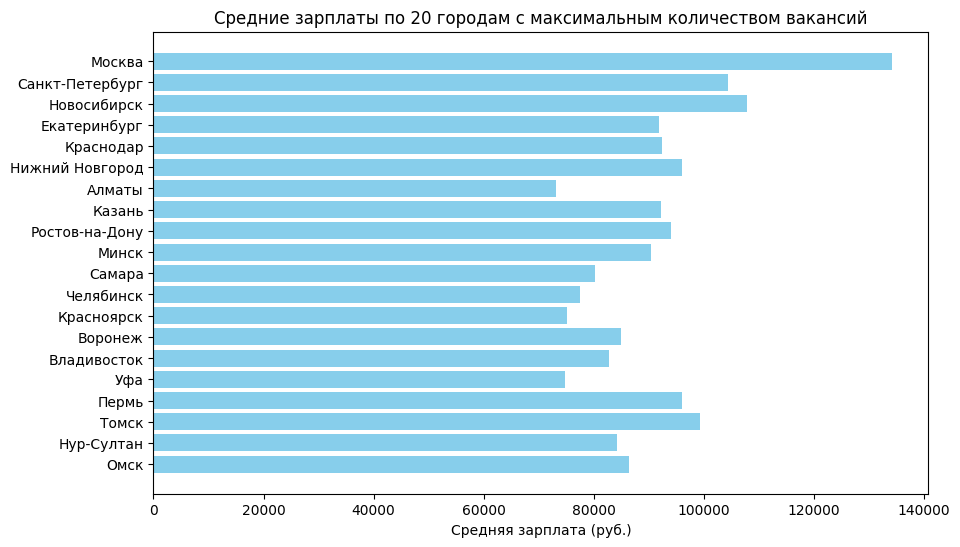

In [ ]:
query_g_1 = """
SELECT a.name AS city,
       AVG((COALESCE(v.salary_from, 0) + COALESCE(v.salary_to, 0)) / 
           CASE WHEN (v.salary_from IS NOT NULL AND v.salary_to IS NOT NULL) THEN 2 ELSE 1 END) AS avg_salary,
       COUNT(v.id) AS vacancy_count
FROM public.vacancies v
JOIN public.areas a ON v.area_id = a.id
WHERE v.salary_from IS NOT NULL OR v.salary_to IS NOT NULL
GROUP BY a.name
ORDER BY COUNT(v.id) DESC
LIMIT 20;
"""
df = pd.read_sql_query(query_g_1, connection)

# Построение графика
plt.figure(figsize=(10, 6))
plt.barh(df['city'], df['avg_salary'], color='skyblue')
plt.xlabel('Средняя зарплата (руб.)')
plt.title('Средние зарплаты по 20 городам с максимальным количеством вакансий')
plt.gca().invert_yaxis()  # Поворот графика
plt.show(png)

In [339]:
# По графику можно сделать вывод, что больше всего открытых вакансий с самой высокой медианной зарплатой, находится в Москве.

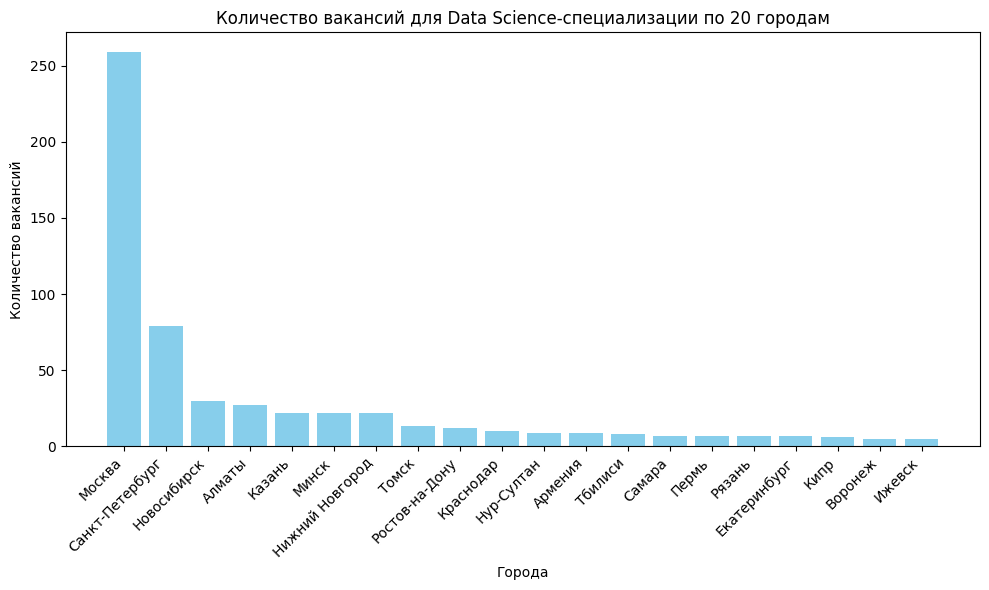

In [ ]:
# Запрос для извлечения данных о вакансиях DS
query_g_2 = """
SELECT a.name AS city,
       COUNT(v.id) AS vacancy_count
FROM public.vacancies v
JOIN public.areas a ON v.area_id = a.id
WHERE (v.name ILIKE '%data scientist%' OR 
       v.name ILIKE '%data science%' OR 
       v.name ILIKE '%исследователь данных%' OR 
       v.name ILIKE '%machine learning%' OR 
       v.name ILIKE '%машинное обучение%' OR 
       v.name ILIKE '%ML%')
GROUP BY a.name
ORDER BY COUNT(v.id) DESC
LIMIT 20;
"""
df = pd.read_sql_query(query_g_2, connection)

# Построение столбчатой диаграммы
plt.figure(figsize=(10, 6))
plt.bar(df['city'], df['vacancy_count'], color='skyblue')
plt.xlabel('Города')
plt.ylabel('Количество вакансий')
plt.title('Количество вакансий для Data Science-специализации по 20 городам')
plt.xticks(rotation=45, ha='right')  # Поворот меток по оси x для лучшей читаемости
plt.tight_layout()  # Для корректной компоновки графика
plt.show(png)

In [ ]:
# График показывает, что большинство вакансий для DS находятся в крупных городах.